# Todos
- IMPORTANT: remove the ID column!
- k means, implement the choice of clusters via centroid distance (Hasan)
- look again at k-NN (Tareq)
- implement complex models
    - focus on **autoencoder approach** (have the feeling this is going to be the best and most straigtforward) (Hasan)
    - try OC Neural Network (Tareq)
    - try GAN (Hasan)
- (if time: try to find better parameters for LOF) 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [1]:
RANDOM_SEED = 0
VALIDATE_SIZE = 0.2

# Comparison to the original data from the website

Dataset from the website https://www.kaggle.com/datasets/nelgiriyewithana/credit-card-fraud-detection-dataset-2023/

<span style="font-size: 150%; color:orange">I think our supervisor only took a subset of the data due to computation resources because its not the same as provided in his repo</span> 

Also there is another credit card fraud dataset not to confuse with our dataset (other dataset: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud).

In [86]:
df = pd.read_csv('../../original_data/creditcard_2023.csv')
df.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [87]:
df.shape

(568630, 31)

In [88]:
df[df["Class"] == 0].shape

(284315, 31)

In [89]:
df[df["Class"] == 1].shape

(284315, 31)

# Data loading

In [3]:
import pickle as pkl

# Data loading
df_head = pd.read_csv('../data/creditcard_2023_head.csv')

# Loading first setup
with open('../data/setup_1.pkl', 'rb') as f:
    setup1 = pkl.load(f)

X_train, _, X_test, y_test = setup1['X_train'], setup1['y_train'], setup1['X_test'], setup1['y_test']

In [4]:
X_train.shape

(255883, 30)

In [5]:
y_train # nothing in y_train for setup 1

NameError: name 'y_train' is not defined

In [ ]:
X_test.shape

In [ ]:
y_test.shape

In [ ]:
X_test[:, 0]

#### Important: y_test is equally distributed!
<span style="font-size: 150%; color:orange">Class: Binary label indicating whether the transaction is fraudulent (1) or not (0)!</span> 

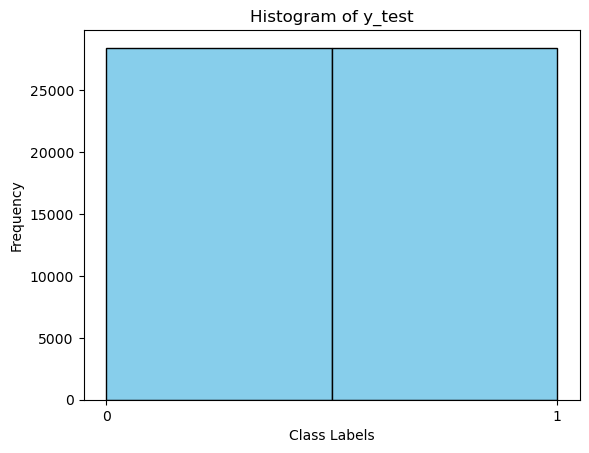

In [38]:
import matplotlib.pyplot as plt

# Plot a histogram of y_test
plt.hist(y_test, bins=2, color='skyblue', edgecolor='black')
plt.xlabel('Class Labels')
plt.ylabel('Frequency')
plt.title('Histogram of y_test')
plt.xticks([0, 1])  # Set the x-axis ticks to match your class labels (0 and 1)
plt.show()

In [6]:
# Assuming the first column is 'id' and the last column is 'amount'
columns = ['Feature_' + str(i) for i in range(1, X_train.shape[1]-1)] + ['Amount']
X_train_df = pd.DataFrame(X_train[:, 1:], columns=columns)  # Excluding 'id'

In [7]:
X_train_df.head()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,...,Feature_20,Feature_21,Feature_22,Feature_23,Feature_24,Feature_25,Feature_26,Feature_27,Feature_28,Amount
0,-0.808528,0.674859,-0.449053,-1.009887,-0.313425,-0.329320,-0.032745,0.596103,0.689862,1.072580,...,-0.051966,0.068797,1.023462,0.377241,-0.611014,-0.430071,-0.385856,0.211656,0.686939,5627.33
1,0.074483,-0.412612,1.567228,-1.086749,-0.002263,-0.020128,0.395198,-0.184193,-0.136276,0.834880,...,0.023013,-0.005700,0.531355,0.016798,0.860576,-0.986578,-0.710048,-0.184877,0.322587,15063.76
2,0.756835,-0.449989,0.898726,0.290844,0.369626,1.465313,0.286892,0.003828,0.492053,0.755715,...,-0.501453,-0.093142,0.212591,0.030729,-1.594817,0.276861,0.412457,-0.159757,-0.075716,19639.65
3,1.171350,-1.101996,-0.226173,-1.968957,0.360373,0.620495,0.532979,-0.149801,1.760402,0.162676,...,0.187468,0.112663,1.158432,-0.370593,-2.443644,0.176785,-1.318719,-0.229471,-0.175032,1983.72
4,-0.076201,0.056564,0.014876,-0.250377,0.840080,0.452710,0.905192,-0.071975,-0.033624,0.376080,...,-0.181484,-0.068607,0.319503,-0.168810,0.221816,0.095515,-0.973325,0.032127,0.323907,13082.62


In [8]:
# Assuming the first column is 'id' and the last column is 'amount'
columns = ['Feature_' + str(i) for i in range(1, X_test.shape[1]-1)] + ['Amount']
X_test_df = pd.DataFrame(X_test[:, 1:], columns=columns)  # Excluding 'id'

In [9]:
X_test_df.head()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,...,Feature_20,Feature_21,Feature_22,Feature_23,Feature_24,Feature_25,Feature_26,Feature_27,Feature_28,Amount
0,-0.426853,0.117655,0.888152,-1.295829,0.084298,0.082360,0.536811,-0.174267,1.535622,1.008322,...,0.037165,-0.179809,-0.328902,0.035453,0.099270,-0.307859,-1.062307,-1.492090,-1.557736,5393.38
1,1.116456,-0.286306,0.263979,-0.264770,0.484545,0.110447,0.637420,-0.219024,0.360507,0.616577,...,-0.278787,-0.127880,-0.140562,-0.294094,-1.007938,1.607509,-0.547411,-0.247355,-0.097371,15378.05
2,0.903121,-0.422710,0.745712,-0.002305,0.028963,0.216350,0.344856,-0.143017,1.129443,0.344090,...,-0.258331,-0.139441,-0.092086,-0.179834,0.628331,0.995390,-0.654657,-0.167291,0.036026,16142.06
3,1.048906,-0.407290,0.706076,-0.306253,0.155251,0.307304,0.417290,-0.186979,0.773683,0.496063,...,-0.185741,-0.146284,-0.020858,-0.188650,0.011005,1.100080,0.997909,-0.244969,-0.080135,13599.92
4,1.819136,-0.403218,-0.076833,-0.445671,0.419591,-0.043953,0.485468,-0.198018,0.873241,0.455003,...,-0.358062,-0.256512,-0.904305,0.328112,0.994757,-0.511889,0.406727,-0.312041,-0.178122,17382.52


In [75]:
X_test_df['label'] = y_test 
X_test_df

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,...,Feature_21,Feature_22,Feature_23,Feature_24,Feature_25,Feature_26,Feature_27,Feature_28,Amount,label
0,-0.426853,0.117655,0.888152,-1.295829,0.084298,0.082360,0.536811,-0.174267,1.535622,1.008322,...,-0.179809,-0.328902,0.035453,0.099270,-0.307859,-1.062307,-1.492090,-1.557736,5393.38,0
1,1.116456,-0.286306,0.263979,-0.264770,0.484545,0.110447,0.637420,-0.219024,0.360507,0.616577,...,-0.127880,-0.140562,-0.294094,-1.007938,1.607509,-0.547411,-0.247355,-0.097371,15378.05,0
2,0.903121,-0.422710,0.745712,-0.002305,0.028963,0.216350,0.344856,-0.143017,1.129443,0.344090,...,-0.139441,-0.092086,-0.179834,0.628331,0.995390,-0.654657,-0.167291,0.036026,16142.06,0
3,1.048906,-0.407290,0.706076,-0.306253,0.155251,0.307304,0.417290,-0.186979,0.773683,0.496063,...,-0.146284,-0.020858,-0.188650,0.011005,1.100080,0.997909,-0.244969,-0.080135,13599.92,0
4,1.819136,-0.403218,-0.076833,-0.445671,0.419591,-0.043953,0.485468,-0.198018,0.873241,0.455003,...,-0.256512,-0.904305,0.328112,0.994757,-0.511889,0.406727,-0.312041,-0.178122,17382.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56859,-1.704517,2.599199,-1.205391,0.503527,-0.949674,3.226002,-2.323095,-6.027712,0.273389,-0.698893,...,8.087080,-6.450353,6.343132,-1.075048,0.349881,-0.240261,1.534445,2.154102,13901.93,1
56860,-1.535811,1.248113,-1.545710,1.505286,-1.802151,-1.898256,-1.790458,1.640605,-1.914443,-1.949687,...,0.657279,-0.457577,-0.129479,1.048965,-0.335299,0.639599,-0.387223,-1.075458,20139.14,1
56861,-0.279757,0.233699,-0.035328,0.086027,-0.096854,-0.267732,-0.094551,-0.138916,-0.333507,-0.304370,...,0.312202,0.069608,-0.040540,0.524696,-0.297618,-0.388502,-0.092224,-0.275857,19560.64,1
56862,-0.569473,-0.027554,0.139328,0.034191,0.002329,0.071340,-0.201616,0.084475,-0.074574,-0.426285,...,0.098295,0.186865,-0.709026,-0.112500,0.194652,-0.861808,0.078332,0.285971,16042.14,1


# Clustering visualization with t-SNE

--> no real separation between anomaly and normal data visible through t-SNE
- reasons
    - the anomaly is really hard to distinguish from normal data
    - we are unlucky with the subset we have picked

In [81]:
RANDOM_SEED = 0
subset_size = 0.1

normal_data = X_test_df[X_test_df['label'] == 0]
anomaly_data = X_test_df[X_test_df['label'] == 1]

normal_data = normal_data.sample(int(len(normal_data) * subset_size), random_state=RANDOM_SEED)
anomaly_data = anomaly_data.sample(int(len(anomaly_data) * subset_size), random_state=RANDOM_SEED)

In [82]:
normal_data

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,...,Feature_21,Feature_22,Feature_23,Feature_24,Feature_25,Feature_26,Feature_27,Feature_28,Amount,label
27737,1.831376,-0.425184,-0.156849,-0.590230,0.425976,-0.620323,0.749685,-0.280639,0.648628,0.604635,...,-0.039369,0.501127,-0.070151,0.111589,0.592995,0.546824,-0.336250,-0.286826,13278.01,0
19370,1.159247,-0.694962,0.139351,-1.568391,0.956987,2.120481,0.098426,0.014528,0.724475,0.725097,...,-0.215840,-0.824807,0.056536,2.028528,0.505883,-1.260979,-0.261033,-0.061666,20063.96,0
1893,0.950450,-0.410494,0.804592,-0.169285,0.141233,0.464362,0.391427,-0.136079,0.628704,0.592011,...,-0.196065,-0.512775,-0.049971,0.040992,0.776486,-1.358817,-0.197307,-0.057846,16649.86,0
12594,1.704643,-0.349722,-0.078381,-0.132977,0.485714,0.117509,0.477496,-0.169159,0.533031,0.602544,...,-0.004768,0.674214,-0.020311,1.393499,0.350371,-1.166057,-0.230692,-0.164055,21132.20,0
25166,1.184674,-0.900295,0.948603,-1.427881,-0.275303,0.253599,0.069487,-0.178288,-0.299917,1.322212,...,-0.160161,-0.107430,-0.050040,-0.176977,0.327118,-0.470481,-0.168397,-0.005074,6526.48,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20819,0.788162,-0.648577,0.806597,-0.608993,-0.019836,0.416842,0.317172,-0.111073,0.642541,0.567634,...,-0.124033,-0.468632,0.053917,0.124731,-0.349802,1.612374,-0.325401,-0.050717,2474.03,0
23069,-0.126035,0.025752,0.028367,-0.970063,0.430884,0.057832,0.578301,-0.051275,0.747431,0.618886,...,0.026364,0.982714,-0.156941,-1.733252,-1.113480,-0.441868,-0.327317,-0.049048,4117.65,0
9469,1.648618,-0.473629,-0.116229,-0.591929,0.809735,1.082194,0.365635,-0.059256,0.687832,0.463625,...,-0.204131,-0.529608,0.382942,-1.382458,-0.870276,0.604463,-0.256052,-0.234935,20706.45,0
25883,1.824382,-0.409977,-0.088172,-0.454576,0.433857,-0.009707,0.480447,-0.194199,0.899017,0.456969,...,-0.259983,-0.933372,0.316134,0.762107,-0.501203,0.421552,-0.313823,-0.181193,8378.73,0


In [83]:
anomaly_data

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,...,Feature_21,Feature_22,Feature_23,Feature_24,Feature_25,Feature_26,Feature_27,Feature_28,Amount,label
56169,-0.345369,-0.391389,0.606814,-0.367490,0.523860,-0.233691,0.567427,-0.186340,0.808299,0.852171,...,-0.362112,-0.383692,0.886935,-0.021540,0.783523,0.186084,0.899747,-0.094137,18381.98,1
47802,-0.132941,0.436248,-0.730143,0.451192,-0.079091,-1.151706,-0.117444,0.009035,-0.792257,-0.834932,...,0.189147,0.145350,-0.151406,-0.405049,0.572120,1.463354,0.523098,0.558529,21147.58,1
30325,-0.333223,0.715215,-1.179781,1.257589,-0.940792,-1.012979,-1.354655,0.525853,-0.923283,-1.724503,...,0.603298,0.365120,0.490551,-1.047611,-2.307720,0.855309,2.778523,1.708244,19988.49,1
41026,-1.040591,-1.213673,-0.616139,0.239100,-0.063256,0.226658,-0.470124,0.384301,-0.458870,-0.700301,...,0.380337,1.084100,-1.322492,-2.206354,-0.445724,0.239331,0.905612,-1.531603,20706.35,1
53598,-1.161336,0.528310,-1.169483,0.998217,-0.798066,-1.380016,-0.952326,0.827751,-1.403277,-1.261158,...,0.318367,-0.523118,0.013709,-0.604327,0.501794,2.056791,1.680844,-0.760172,8835.18,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49251,0.224665,0.036491,-0.170688,0.135292,-0.139213,-0.525114,-0.113648,-0.039554,-0.249297,-0.385606,...,0.069874,-0.106777,-0.062321,0.720899,0.669743,0.625016,0.405512,0.587315,8898.23,1
51501,-2.617201,3.329626,-2.500482,1.283231,-3.267187,-2.889217,-2.460262,5.854570,-1.055819,-1.164005,...,0.574812,-1.892688,-1.368261,0.390193,3.766802,-0.484450,1.501811,0.773225,18263.62,1
37901,-0.874605,0.324989,-0.567285,1.028348,-0.240130,-0.463019,-0.503886,-0.024293,-0.201941,-0.623599,...,0.118441,-0.103774,0.292347,-0.410488,0.426970,0.024972,-1.598032,1.403703,4271.32,1
54315,-0.078808,-0.739405,-0.061604,0.758590,-0.194184,0.409030,0.761526,-0.120557,-0.249556,0.153855,...,0.098833,-0.486831,0.400635,0.524276,-0.493826,-0.594333,-0.230222,0.348181,3989.61,1


C:\Users\Hasan\anaconda3\envs\env_full\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Hasan\anaconda3\envs\env_full\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


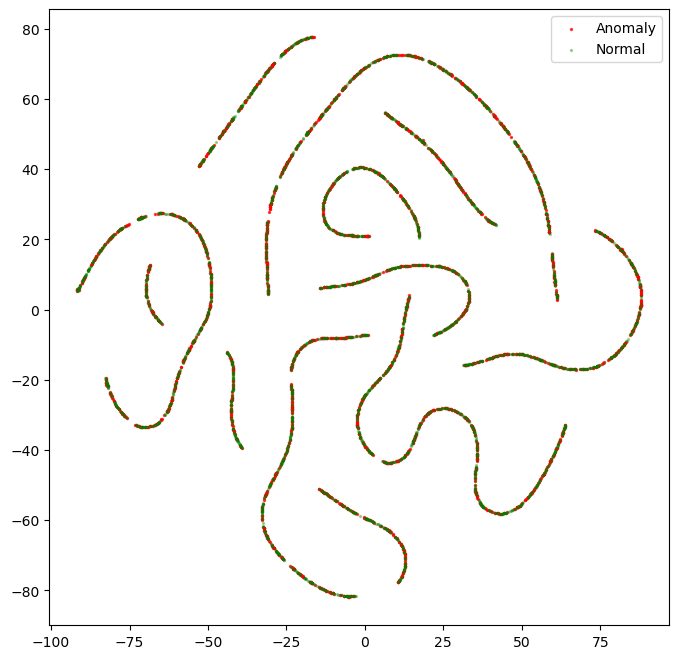

In [84]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

RANDOM_SEED = 42

# Assuming X_test and y_test are already defined
features = pd.concat([normal_data, anomaly_data])
labels = features['label']

from mpl_toolkits.mplot3d import Axes3D

def tsne_scatter(features, labels, dimensions=2, save_as='graph.png'):
    if dimensions not in (2, 3):
        raise ValueError('tsne_scatter can only plot in 2d or 3d. Make sure the "dimensions" argument is in (2, 3)')

    # t-SNE dimensionality reduction
    features_embedded = TSNE(n_components=dimensions, random_state=RANDOM_SEED).fit_transform(features)
    
    # initialising the plot
    fig, ax = plt.subplots(figsize=(8,8))
    
    # counting dimensions
    if dimensions == 3: 
        ax = fig.add_subplot(111, projection='3d')

    # plotting data
    ax.scatter(
        *zip(*features_embedded[np.where(labels == 1)]),
        marker='o',
        color='r',
        s=2,
        alpha=0.7,
        label='Anomaly'
    )
    ax.scatter(
        *zip(*features_embedded[np.where(labels == 0)]),
        marker='o',
        color='g',
        s=2,
        alpha=0.3,
        label='Normal'
    )

    # storing it to be displayed later
    plt.legend(loc='best')
    plt.savefig(save_as)
    plt.show()

# Call the function to create the scatter plot
tsne_scatter(features, labels, dimensions=2, save_as='tsne_test_2d.png')


C:\Users\Hasan\anaconda3\envs\env_full\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Hasan\anaconda3\envs\env_full\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


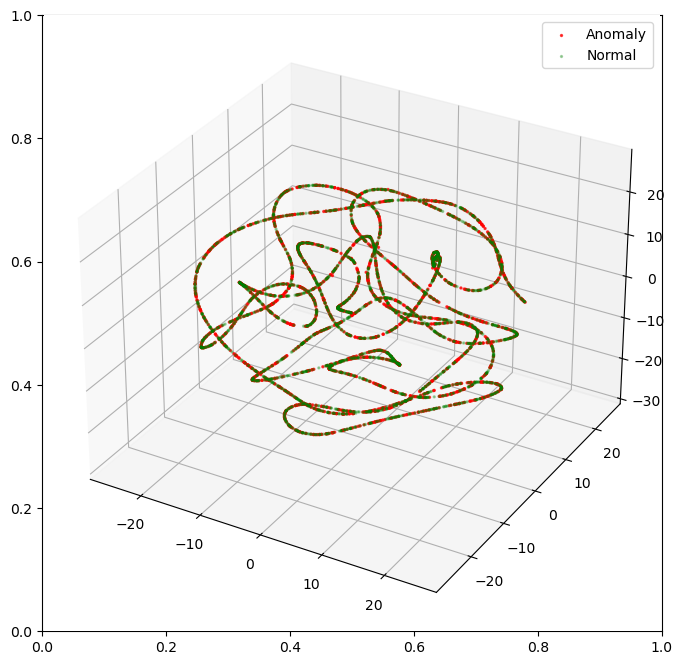

In [85]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

RANDOM_SEED = 42

# Assuming X_test and y_test are already defined
features = pd.concat([normal_data, anomaly_data])
labels = features['label']

from mpl_toolkits.mplot3d import Axes3D

def tsne_scatter(features, labels, dimensions=2, save_as='graph.png'):
    if dimensions not in (2, 3):
        raise ValueError('tsne_scatter can only plot in 2d or 3d. Make sure the "dimensions" argument is in (2, 3)')

    # t-SNE dimensionality reduction
    features_embedded = TSNE(n_components=dimensions, random_state=RANDOM_SEED).fit_transform(features)
    
    # initialising the plot
    fig, ax = plt.subplots(figsize=(8,8))
    
    # counting dimensions
    if dimensions == 3: 
        ax = fig.add_subplot(111, projection='3d')

    # plotting data
    ax.scatter(
        *zip(*features_embedded[np.where(labels == 1)]),
        marker='o',
        color='r',
        s=2,
        alpha=0.7,
        label='Anomaly'
    )
    ax.scatter(
        *zip(*features_embedded[np.where(labels == 0)]),
        marker='o',
        color='g',
        s=2,
        alpha=0.3,
        label='Normal'
    )

    # storing it to be displayed later
    plt.legend(loc='best')
    plt.savefig(save_as)
    plt.show()

# Call the function to create the scatter plot
tsne_scatter(features, labels, dimensions=3, save_as='tsne_test_3d.png')


# Anomaly Detection

## Baselines

<span style="font-size: 150%; color:red">unfortunately forgotten to drop the id column from the training and testing dataset (could have slight influence on the peroformance of the models)</span>

### Naive Baseline (always say normal data)
---> the other baselines should at least be as good as this naive baseline

In [51]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

ground_truth_labels = y_test

y_pred = [True for i in X_test]  # naive
precision = precision_score(ground_truth_labels, y_pred)
recall = recall_score(ground_truth_labels, y_pred)
f1_score = f1_score(ground_truth_labels, y_pred)
roc_auc = roc_auc_score(ground_truth_labels, y_pred)

# Print evaluation metrics for both methods
print("Evaluation Metrics for k=2:")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1_score}")
print(f"AUC-ROC: {roc_auc}")

Evaluation Metrics for k=2:
Precision: 0.5
Recall: 1.0
F1-Score: 0.6666666666666666
AUC-ROC: 0.5


### Kmeans (99,8 % F1 score)

<span style="font-size: 150%; color:green">surprisingly good</span>

- **one idea**: put training and testing data together and then try to create two clusters (if only training data is taken, then it makes no sense because there are no anomalies)
    - problem: unknown if its better to only use the testing data

- **problem**: this method is not very well suited for our problem because:
    - When you set k=2 in K-means, you are essentially asking the algorithm to partition the data into two clusters. However, the clusters may not correspond to "anomalies" and "normal" in a straightforward way. K-means aims to minimize the sum of squared distances within clusters, and it may not be well-suited for directly separating anomalies from normal data. (so it could be that setting k=10 is better and 8 of the 10 clusters are normal data and 2 of the 10 clusters are anomalies which the algorithm would not find when setting k=2)
        - **counteract**: try out different values of k only on the testing data and look at the elbow curve. Look for the point on the plot where the inertia starts to decrease at a slower rate, forming an "elbow." This point is a good candidate for the optimal k. It indicates that adding more clusters beyond this point doesn't significantly reduce the inertia.
- **improvement**: rescale the data!

In [29]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

we can see that
- the inertia drops heavily for k=2 (probably best)
- but k=3 can also be considered (and then two clusters are normal data and one cluster is anomaly for example)

K-value:  1
K-value:  2
K-value:  3
K-value:  4
K-value:  5
K-value:  6
K-value:  7
K-value:  8
K-value:  9
K-value:  10


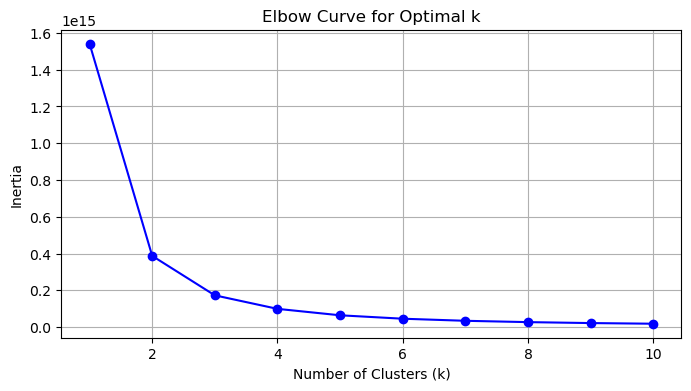

In [30]:
# Define a range of k values to test 1- 10
k_values = range(1, 11)
inertia_values = []

# Fit K-means for each k and compute inertia
for k in k_values:
    print("K-value: ", k)
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_test)
    inertia_values.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 4))
plt.plot(k_values, inertia_values, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve for Optimal k')
plt.grid(True)
plt.show()

#### how to say which cluster is anomaly and which not? 
--> its really not that easy in our case because the number of anomaly data points is the same as normal data points, the intertia is also not a indicator here ...

- **Size of the Cluster** (not applicable in our case because y_test is equally distributed):
    - One straightforward approach is to consider the size of each cluster. Smaller clusters are more likely to be anomalies, as they represent data points that are less common. You can set a threshold on the cluster size and flag clusters with fewer points as potential anomalies.

- **Distance to Cluster Center**:
    - Calculate the distance of each data point in a cluster to the cluster's centroid. Data points that are far from the centroid are more likely to be anomalies. You can set a threshold on the distance to identify anomalies within a cluster.

- Other methods: 
    - **Manual Inspection (through plots)**
    - Inertia or Variance within Cluster:
    - Statistical Significance:

#### with size of cluster (not good! see above)

In [31]:
from sklearn.cluster import KMeans

# Define the number of clusters
k_values = [2, 3]

# Initialize lists to store cluster assignments and anomalies
cluster_assignments = {}
anomalies = {}

# Fit K-means for each k and assign clusters
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    cluster_assignments[k] = kmeans.fit_predict(X_test)

# Find the cluster with the fewest data points for each k
for k in k_values:
    cluster_counts = {}
    
    # Count the number of data points in each cluster
    for cluster_label in range(k):
        count = len(cluster_assignments[k][cluster_assignments[k] == cluster_label])
        cluster_counts[cluster_label] = count
    
    # Find the cluster with the minimum data points
    min_count_cluster = min(cluster_counts, key=cluster_counts.get)
    
    # Assign the cluster with fewer data points as anomalies
    anomalies[k] = (cluster_assignments[k] == min_count_cluster)

# Print the anomalies for k=2 and k=3
print("Anomalies for k=2:")
print(anomalies[2])

print("Anomalies for k=3:")
print(anomalies[3])

Anomalies for k=2:
[ True  True  True ... False False False]
Anomalies for k=3:
[False False False ...  True  True False]


#### with intertia value

In [39]:
from sklearn.cluster import KMeans

# Define the number of clusters
k_values = [2, 3]

# Initialize lists to store cluster assignments and anomalies
cluster_assignments = {}
anomalies = {}

# Fit K-means for each k and assign clusters
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    cluster_assignments[k] = kmeans.fit_predict(X_test)

# Find the cluster with the highest inertia for each k
for k in k_values:
    cluster_inertias = {}
    
    # Calculate inertia for each cluster
    for cluster_label in range(k):
        cluster_points = X_test[cluster_assignments[k] == cluster_label]
        cluster_center = kmeans.cluster_centers_[cluster_label]
        inertia = np.sum(np.linalg.norm(cluster_points - cluster_center, axis=1) ** 2)
        cluster_inertias[cluster_label] = inertia
    
    # Find the cluster with the maximum inertia
    max_inertia_cluster = max(cluster_inertias, key=cluster_inertias.get)
    
    # Assign the cluster with the highest inertia as anomalies
    anomalies[k] = (cluster_assignments[k] == max_inertia_cluster)

# Print the anomalies for k=2 and k=3
print("Anomalies for k=2:")
print(anomalies[2])

print("Anomalies for k=3:")
print(anomalies[3])


Anomalies for k=2:
[ True  True  True ... False False False]
Anomalies for k=3:
[ True  True  True ... False False False]


We can see from this plot that
- k=2 is definitely better than k=3 because k=3 makes 3 equal sized clusters which is unfortunate in our case

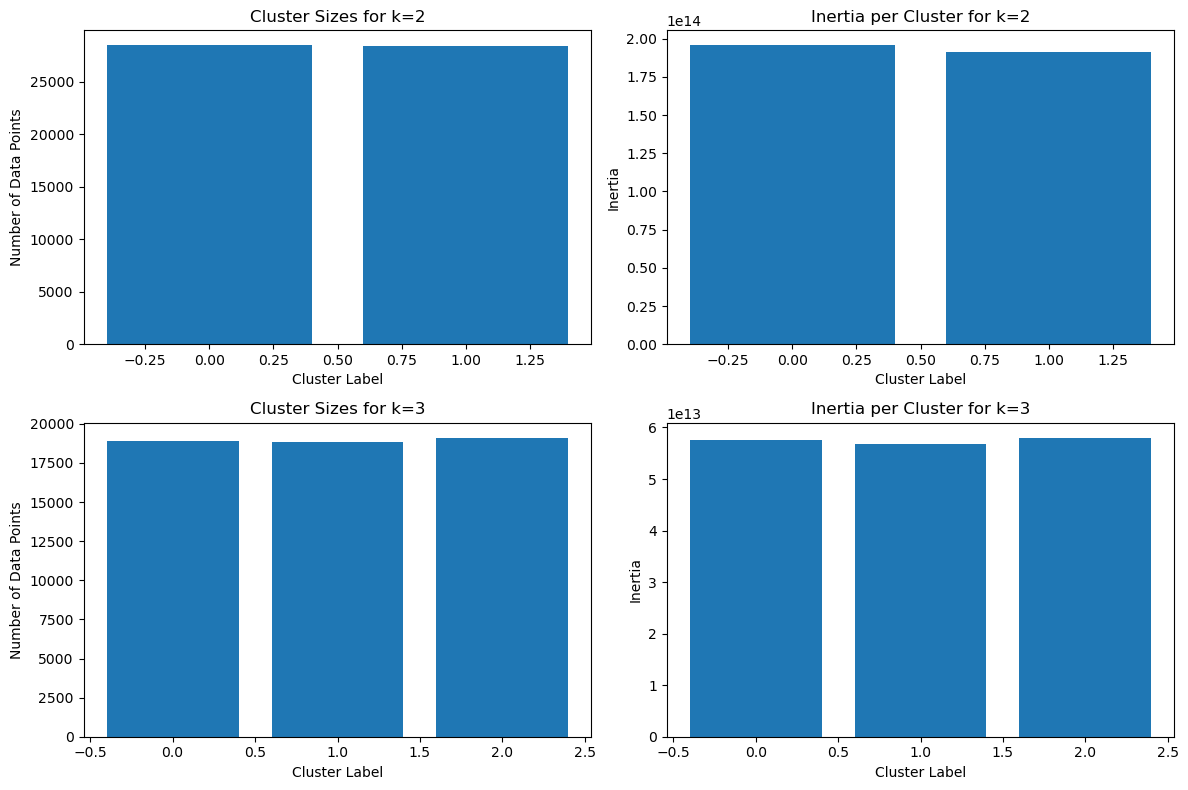

In [40]:
import matplotlib.pyplot as plt
import numpy as np

# Initialize subplots for k=2 and k=3
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Loop through k=2 and k=3
for idx, k in enumerate([2, 3]):
    # Fit K-means for the current k
    kmeans = KMeans(n_clusters=k, random_state=0)
    cluster_assignments = kmeans.fit_predict(X_test)
    
    # Compute cluster sizes
    unique, counts = np.unique(cluster_assignments, return_counts=True)
    cluster_sizes = dict(zip(unique, counts))
    
    # Compute inertia per cluster
    cluster_inertia = np.zeros(k)
    for cluster_label in range(k):
        cluster_points = X_test[cluster_assignments == cluster_label]
        cluster_center = kmeans.cluster_centers_[cluster_label]
        cluster_inertia[cluster_label] = np.sum(np.linalg.norm(cluster_points - cluster_center, axis=1) ** 2)
    
    # Plot cluster sizes
    axes[idx, 0].bar(cluster_sizes.keys(), cluster_sizes.values())
    axes[idx, 0].set_title(f'Cluster Sizes for k={k}')
    axes[idx, 0].set_xlabel('Cluster Label')
    axes[idx, 0].set_ylabel('Number of Data Points')
    
    # Plot inertia per cluster
    axes[idx, 1].bar(range(k), cluster_inertia)
    axes[idx, 1].set_title(f'Inertia per Cluster for k={k}')
    axes[idx, 1].set_xlabel('Cluster Label')
    axes[idx, 1].set_ylabel('Inertia')

# Add spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

#### evaluation metrics are bad --> just switch the classification labels from true to false

In [41]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

# Ground truth labels for anomalies (if available)
# Replace 'ground_truth_labels' with your actual ground truth labels
ground_truth_labels = y_test

# Evaluate method for k=2
y_pred_k2 = anomalies[2].astype(int)  # Convert boolean to integer
precision_k2 = precision_score(ground_truth_labels, y_pred_k2)
recall_k2 = recall_score(ground_truth_labels, y_pred_k2)
f1_score_k2 = f1_score(ground_truth_labels, y_pred_k2)
roc_auc_k2 = roc_auc_score(ground_truth_labels, y_pred_k2)

# Evaluate method for k=3
y_pred_k3 = anomalies[3].astype(int)  # Convert boolean to integer
precision_k3 = precision_score(ground_truth_labels, y_pred_k3)
recall_k3 = recall_score(ground_truth_labels, y_pred_k3)
f1_score_k3 = f1_score(ground_truth_labels, y_pred_k3)
roc_auc_k3 = roc_auc_score(ground_truth_labels, y_pred_k3)

# Print evaluation metrics for both methods
print("Evaluation Metrics for k=2:")
print(f"Precision: {precision_k2}")
print(f"Recall: {recall_k2}")
print(f"F1-Score: {f1_score_k2}")
print(f"AUC-ROC: {roc_auc_k2}")

print("\nEvaluation Metrics for k=3:")
print(f"Precision: {precision_k3}")
print(f"Recall: {recall_k3}")
print(f"F1-Score: {f1_score_k3}")
print(f"AUC-ROC: {roc_auc_k3}")


Evaluation Metrics for k=2:
Precision: 0.0014785608674223755
Recall: 0.0014772087788407428
F1-Score: 0.0014778845138815582
AUC-ROC: 0.0019344400675295299

Evaluation Metrics for k=3:
Precision: 0.0019882796149016326
Recall: 0.0013365222284749578
F1-Score: 0.0015985192663637894
AUC-ROC: 0.1652363534046145


In [43]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

# Ground truth labels for anomalies (if available)
# Replace 'ground_truth_labels' with your actual ground truth labels
ground_truth_labels = y_test

# Evaluate method for k=2
y_pred_k2_flipped = [not i for i in y_pred_k2]  # flip values
precision_k2 = precision_score(ground_truth_labels, y_pred_k2_flipped)
recall_k2 = recall_score(ground_truth_labels, y_pred_k2_flipped)
f1_score_k2 = f1_score(ground_truth_labels, y_pred_k2_flipped)
roc_auc_k2 = roc_auc_score(ground_truth_labels, y_pred_k2_flipped)

# Evaluate method for k=3
y_pred_k3_flipped = [not i for i in y_pred_k3]  # flip values
precision_k3 = precision_score(ground_truth_labels, y_pred_k3_flipped)
recall_k3 = recall_score(ground_truth_labels, y_pred_k3_flipped)
f1_score_k3 = f1_score(ground_truth_labels, y_pred_k3_flipped)
roc_auc_k3 = roc_auc_score(ground_truth_labels, y_pred_k3_flipped)

# Print evaluation metrics for both methods
print("Evaluation Metrics for k=2:")
print(f"Precision: {precision_k2}")
print(f"Recall: {recall_k2}")
print(f"F1-Score: {f1_score_k2}")
print(f"AUC-ROC: {roc_auc_k2}")

print("\nEvaluation Metrics for k=3:")
print(f"Precision: {precision_k3}")
print(f"Recall: {recall_k3}")
print(f"F1-Score: {f1_score_k3}")
print(f"AUC-ROC: {roc_auc_k3}")


Evaluation Metrics for k=2:
Precision: 0.997610513739546
Recall: 0.9985227912211593
F1-Score: 0.9980664440147654
AUC-ROC: 0.9980655599324705

Evaluation Metrics for k=3:
Precision: 0.7521190930281839
Recall: 0.9986634777715251
F1-Score: 0.858032152786172
AUC-ROC: 0.8347636465953855


### DBScan (this method is really not well suited for this anomaly detection problem, its very very parameter dependent... )
<span style="font-size: 150%; color:red">stop investigating this method further</span>

Hyperparameters
- Epsilon value
- Min samples

how to find out a good epsilon value?

**K-Distance Graph (Elbow Curve again)**:

- Calculate the k-distance for each data point, which represents the distance to its k-th nearest neighbor. You can choose a value of k that makes sense for your data, such as 4 or 5.
- Sort these k-distances in ascending order.
- Plot the sorted k-distances on a graph. Typically, you'll see a "k-distance elbow" in the graph, where the distances suddenly increase. This point can be a good estimate for the epsilon value.

how to find a good min samples value?

**Min Samples to Number of Clusters Plot (similar to elbow curve)**

- after having found a good epsilon, run the DBScan algorithm for different min sample values and look how many clusters are made for the different values. There are different strategies to pick here:
    - take the min samples value after the greatest change 
    - take the min samples value before the cluster size goes to 1 or 0 (**our approach**)
    


**Improvement**: 
- Let min samples / epsilon grid search run through one time

In [5]:
# scale the data
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the scaler on your X_test data
X_test_scaled = scaler.fit_transform(X_test)

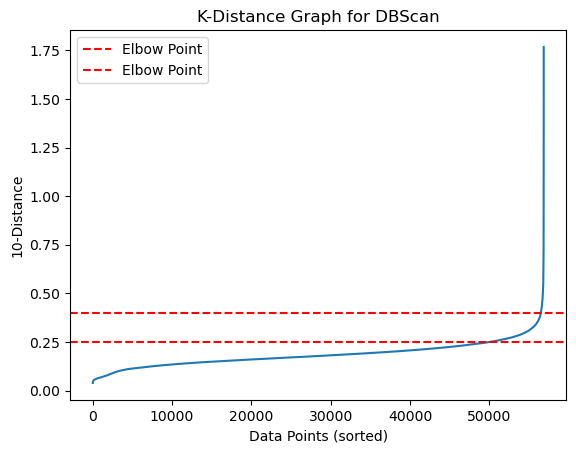

In [30]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import numpy as np

# Lets consider 10 as nearest neighbors
k = 10

# Calculate k-distances
neigh = NearestNeighbors(n_neighbors=k)
distances, _ = neigh.fit(X_test_scaled).kneighbors(X_test_scaled)
k_distances = distances[:, -1]  # Get the k-th nearest neighbor distance

# Sort the distances
sorted_distances = np.sort(k_distances)

# Compute the second derivative
# second_derivative = np.diff(np.diff(sorted_distances))

# Find the elbow point (where the second derivative changes from negative to positive)
# elbow_index = np.where(second_derivative > 0)[0][0]

# Plot the k-distance graph with the elbow point
plt.plot(sorted_distances)
# plt.plot(second_derivative, label='Second derivative')
# plt.axvline(x=elbow_index, color='r', linestyle='--', label='Elbow Point')
plt.axhline(y=0.25, color='r', linestyle='--', label='Elbow Point')
plt.axhline(y=0.40, color='r', linestyle='--', label='Elbow Point')
plt.xlabel('Data Points (sorted)')
plt.ylabel(f'{k}-Distance')
plt.title(f'K-Distance Graph for DBScan')
plt.legend()
plt.show()

# The elbow_index variable contains the index of the elbow point
# epsilon = sorted_distances[elbow_index]
# print(f"Estimated Epsilon (ε): {epsilon}")

--> we can see that it makes sense to choose epsilon somewhere between 0.25 and 0.4. 

In [37]:
min_samples = range(2,11)
eps = np.arange(0.25, 0.40, 0.01)

In [39]:
# takes very long ...
from sklearn.metrics import silhouette_score

output = []

for ms in min_samples:
    print("Min Sample: ", ms)
    for ep in eps:
        print("Epsilon: ", ep)
        labels = DBSCAN(min_samples=ms, eps = ep).fit(X_test_scaled).labels_
        print("DBScan finished!")
        score = silhouette_score(X_test_scaled, labels)
        output.append((ms, ep, score))

Min Sample:  2
Epsilon:  0.25
DBScan finished!
Epsilon:  0.26
DBScan finished!
Epsilon:  0.27
DBScan finished!
Epsilon:  0.28
DBScan finished!
Epsilon:  0.29000000000000004
DBScan finished!
Epsilon:  0.30000000000000004
DBScan finished!
Epsilon:  0.31000000000000005
DBScan finished!
Epsilon:  0.32000000000000006
DBScan finished!
Epsilon:  0.33000000000000007
DBScan finished!
Epsilon:  0.3400000000000001
DBScan finished!


KeyboardInterrupt: 

In [40]:
output

[(2, 0.25, -0.34111954411523776),
 (2, 0.26, -0.3315103296400275),
 (2, 0.27, -0.2954295120879108),
 (2, 0.28, -0.2645761271644875),
 (2, 0.29000000000000004, -0.21780415442935228),
 (2, 0.30000000000000004, -0.1903237130504693),
 (2, 0.31000000000000005, -0.15084058004810033),
 (2, 0.32000000000000006, -0.11897391416442858),
 (2, 0.33000000000000007, -0.13336827720117844)]

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Your output data
output = [
    (ms, ep, score) for ms, ep, score in output
]

# Separate the data into three lists
min_samples_values = [item[0] for item in output]
epsilon_values = [item[1] for item in output]
silhouette_scores = [item[2] for item in output]

# Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the data points
ax.scatter(min_samples_values, epsilon_values, silhouette_scores, c=silhouette_scores, cmap='viridis')

# Set labels for the axes
ax.set_xlabel('min_samples')
ax.set_ylabel('epsilon (ε)')
ax.set_zlabel('Silhouette Score')

# Set the title
ax.set_title('3D Plot of Silhouette Scores vs. min_samples and epsilon (ε)')

plt.show()


In [ ]:
min_samples, eps, score = sorted(output, key=lambda x:x[-1])[-1]
print(f"Best silhouette_score: {score}")
print(f"min_samples: {min_samples}")
print(f"eps: {eps}")

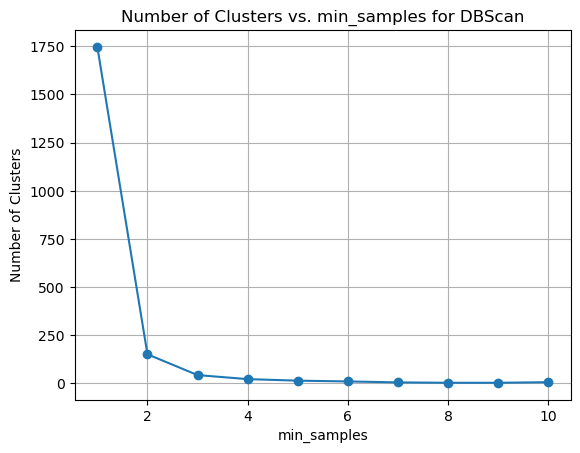

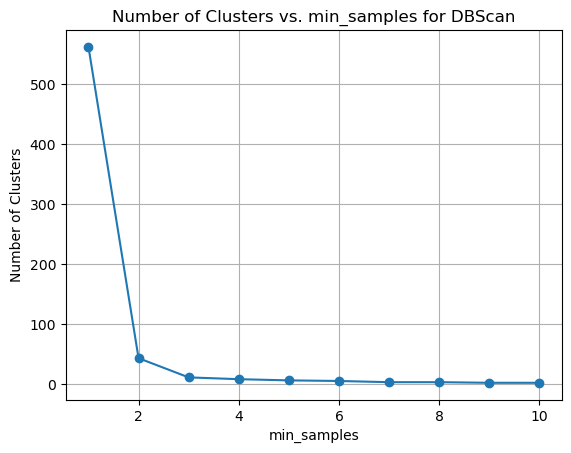

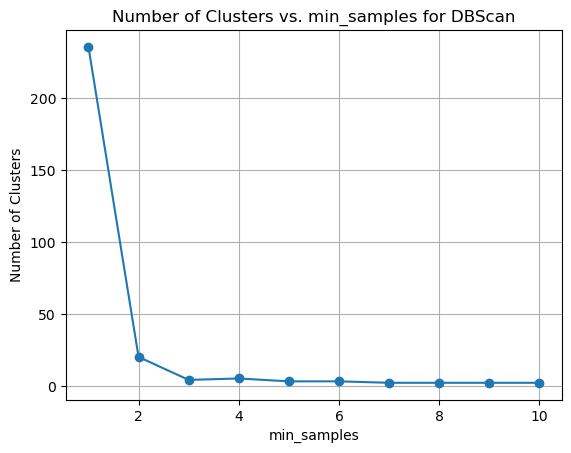

In [55]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import numpy as np

# Define a range of min_samples values to test
min_samples_values = range(1, 11)  # Adjust the range as needed

# Initialize a list to store the number of clusters for each min_samples
num_clusters = []

# Iterate through different min_samples values
for min_samples in min_samples_values:
    dbscan = DBSCAN(eps=0.25, min_samples=min_samples)
    cluster_labels = dbscan.fit_predict(X_test_scaled)
    
    # Count the number of clusters (excluding noise, represented as -1)
    num_unique_clusters = len(np.unique(cluster_labels)) - 1
    
    num_clusters.append(num_unique_clusters)

# Plot the number of clusters for each min_samples value
plt.plot(min_samples_values, num_clusters, marker='o', linestyle='-')
plt.xlabel('min_samples')
plt.ylabel('Number of Clusters')
plt.title('Number of Clusters vs. min_samples for DBScan')
plt.grid(True)
plt.show()

# Define a range of min_samples values to test
min_samples_values = range(1, 11)  # Adjust the range as needed

# Initialize a list to store the number of clusters for each min_samples
num_clusters = []

# Iterate through different min_samples values
for min_samples in min_samples_values:
    dbscan = DBSCAN(eps=0.30, min_samples=min_samples)
    cluster_labels = dbscan.fit_predict(X_test_scaled)
    
    # Count the number of clusters (excluding noise, represented as -1)
    num_unique_clusters = len(np.unique(cluster_labels)) - 1
    
    num_clusters.append(num_unique_clusters)

# Plot the number of clusters for each min_samples value
plt.plot(min_samples_values, num_clusters, marker='o', linestyle='-')
plt.xlabel('min_samples')
plt.ylabel('Number of Clusters')
plt.title('Number of Clusters vs. min_samples for DBScan')
plt.grid(True)
plt.show()

# Define a range of min_samples values to test
min_samples_values = range(1, 11)  # Adjust the range as needed

# Initialize a list to store the number of clusters for each min_samples
num_clusters = []

# Iterate through different min_samples values
for min_samples in min_samples_values:
    dbscan = DBSCAN(eps=0.35, min_samples=min_samples)
    cluster_labels = dbscan.fit_predict(X_test_scaled)
    
    # Count the number of clusters (excluding noise, represented as -1)
    num_unique_clusters = len(np.unique(cluster_labels)) - 1
    
    num_clusters.append(num_unique_clusters)

# Plot the number of clusters for each min_samples value
plt.plot(min_samples_values, num_clusters, marker='o', linestyle='-')
plt.xlabel('min_samples')
plt.ylabel('Number of Clusters')
plt.title('Number of Clusters vs. min_samples for DBScan')
plt.grid(True)
plt.show()

In [53]:
num_clusters

[562, 43, 11, 8, 6, 5, 3, 3, 2, 2]

Results so far...
- eps = 0.35 with min_samples = 7 does not work well
- eps = 0.30 with min_samples = 9 does not work well
- eps = 0.25 with min_samples = 4, 5, 6, 7, 8 does not work well

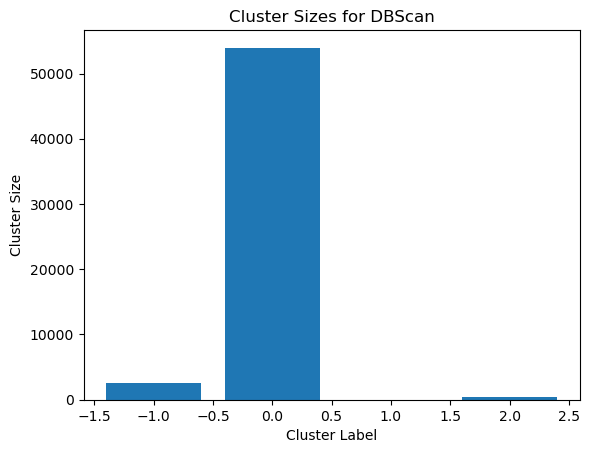

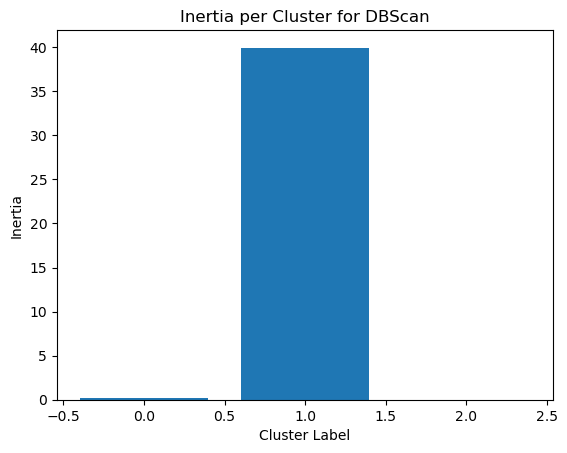

In [63]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import numpy as np

# Define epsilon value computed earlier
epsilon = epsilon  # computed above

# Fit DBScan with min_samples=7 and computed epsilon
dbscan = DBSCAN(eps=0.25, min_samples=8)
cluster_labels = dbscan.fit_predict(X_test_scaled)

# Plot the cluster sizes
unique_labels, cluster_sizes = np.unique(cluster_labels, return_counts=True)
plt.bar(unique_labels, cluster_sizes)
plt.xlabel('Cluster Label')
plt.ylabel('Cluster Size')
plt.title('Cluster Sizes for DBScan')
plt.show()

# Calculate the inertia per cluster
inertia_per_cluster = np.zeros(len(unique_labels))
for label in unique_labels:
    if label != -1:  # Exclude noise cluster
        cluster_points = X_test_scaled[cluster_labels == label]
        cluster_center = np.mean(cluster_points, axis=0)
        inertia = np.sum(np.linalg.norm(cluster_points - cluster_center, axis=1) ** 2)
        inertia_per_cluster[label] = inertia

# Plot the inertia per cluster
plt.bar(unique_labels[unique_labels != -1], inertia_per_cluster[unique_labels != -1])
plt.xlabel('Cluster Label')
plt.ylabel('Inertia')
plt.title('Inertia per Cluster for DBScan')
plt.show()

In [64]:
cluster_sizes

array([ 2533, 53951,     8,   372], dtype=int64)

### One-Class SVM

<span style="font-size: 150%; color:red">reduce data dimension!</span>

- sklearn.svm.OneClassSVM takes really long because of quadratic running time (not well suited for high dimensional data and a lot of data)
- sklearn.linear.SGDOneClassSVM is much faster but only uses a linear kernel (only 0.18 seconds compared to hours i dont know...)
    - does only say 1 for everything if data is not scaled (not better than naive classifier)
    - does perform better when the data is MinMax scaled
        - --> this really indicates that the linear kernel is underfitting the high-dimensional data and we should apply dimension reduction in order to apply SGD OCSVM
    - taking subset of the training data has no influence on the two oberservations above 
    
**Improvement**: Data dimensionality reduction before applying one-class SVM is highly recommended! this was not the case for the previous two methods

In [7]:
# scale the data
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the scaler on your X_test data
X_train_scaled = scaler.fit_transform(X_train)

#### OCSVM (only minibatch training because of comp. time, says only 0 on test set)

In [8]:
from sklearn.svm import OneClassSVM
import time

# Timing and Training the One-Class SVM model
start_time = time.time()
oc_svm = OneClassSVM().fit(X_train_scaled[:10000]) # train on subset because of huge computing time
oc_svm_duration = time.time() - start_time
print(f"One-Class SVM training time: {oc_svm_duration:.2f} seconds")

One-Class SVM training time: 3.56 seconds


C:\Users\Hasan\anaconda3\envs\env_full\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hasan\anaconda3\envs\env_full\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hasan\anaconda3\envs\env_full\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


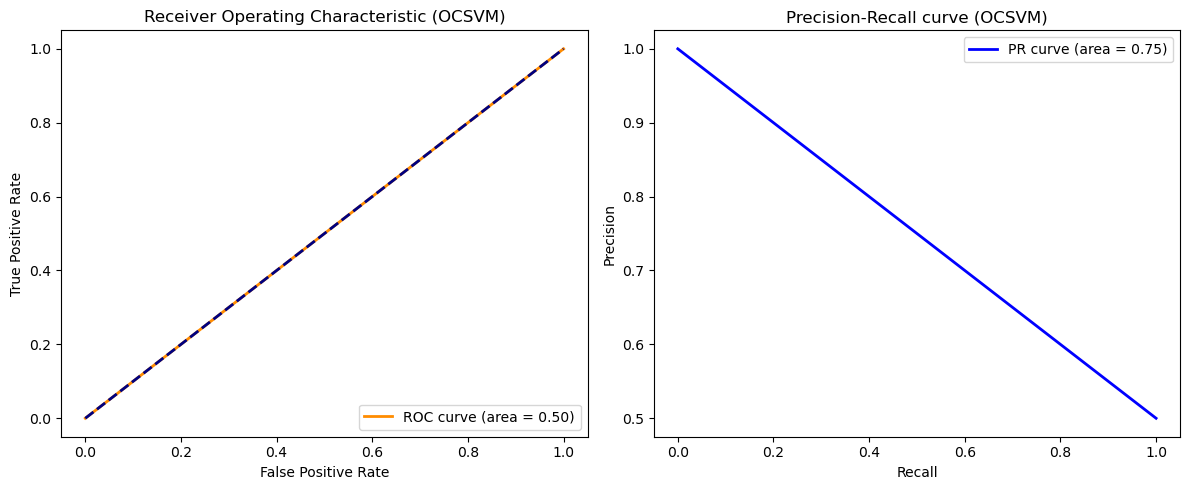

              precision    recall  f1-score   support

           0       0.50      1.00      0.67     28432
           1       0.00      0.00      0.00     28432

    accuracy                           0.50     56864
   macro avg       0.25      0.50      0.33     56864
weighted avg       0.25      0.50      0.33     56864



In [9]:
from sklearn.metrics import (
    f1_score,
    confusion_matrix,
    mean_absolute_error,
    mean_squared_error,
    precision_recall_curve,
    r2_score,
    roc_auc_score,
    classification_report,
    roc_curve, 
    auc
)

X_test_scaled = scaler.fit_transform(X_test)

# Predict on the test set
y_pred_test = oc_svm.predict(X_test_scaled)
# Convert predictions to match y_test labels (0 for anomalies, 1 for normal)
y_pred_test = (y_pred_test == 1).astype(int)

# Calculate ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_test)
roc_auc = auc(fpr, tpr)

# Calculate Precision-Recall Curve and AUC
precision, recall, _ = precision_recall_curve(y_test, y_pred_test)
pr_auc = auc(recall, precision)

# Generate a classification report
class_report = classification_report(y_test, y_pred_test)

# Plotting the ROC and Precision-Recall Curves
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (OCSVM)')
plt.legend(loc="lower right")

plt.subplot(1, 2, 2)
plt.plot(recall, precision, color='blue', lw=2, label=f'PR curve (area = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve (OCSVM)')
plt.legend(loc="upper right")

plt.tight_layout()
plt.show()

print(class_report)

In [13]:
np.unique(np.array(y_pred_test))

array([0])

#### SGD OCSVM (very fast but no groundbreaking results)

In [20]:
from sklearn.linear_model import SGDOneClassSVM
import time

# Timing and Training the One-Class SVM model
start_time = time.time()
sgd_oc_svm = SGDOneClassSVM().fit(X_train_scaled)
oc_svm_duration = time.time() - start_time
print(f"SGD One-Class SVM training time: {oc_svm_duration:.2f} seconds")

SGD One-Class SVM training time: 0.21 seconds


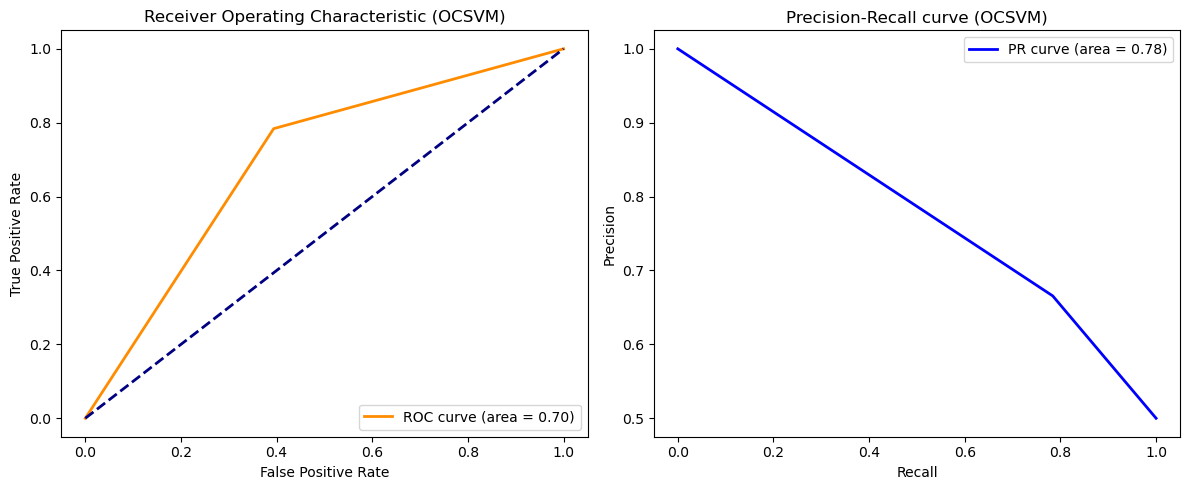

              precision    recall  f1-score   support

           0       0.74      0.61      0.67     28432
           1       0.67      0.78      0.72     28432

    accuracy                           0.70     56864
   macro avg       0.70      0.70      0.69     56864
weighted avg       0.70      0.70      0.69     56864



In [21]:
from sklearn.metrics import (
    f1_score,
    confusion_matrix,
    mean_absolute_error,
    mean_squared_error,
    precision_recall_curve,
    r2_score,
    roc_auc_score,
    classification_report,
    roc_curve, 
    auc
)

X_test_scaled = scaler.fit_transform(X_test)

# Predict on the test set
y_pred_test = sgd_oc_svm.predict(X_test_scaled)
# Convert predictions to match y_test labels (0 for anomalies, 1 for normal)
y_pred_test = (y_pred_test == 1).astype(int)

# Calculate ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_test)
roc_auc = auc(fpr, tpr)

# Calculate Precision-Recall Curve and AUC
precision, recall, _ = precision_recall_curve(y_test, y_pred_test)
pr_auc = auc(recall, precision)

# Generate a classification report
class_report = classification_report(y_test, y_pred_test)

# Plotting the ROC and Precision-Recall Curves
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (OCSVM)')
plt.legend(loc="lower right")

plt.subplot(1, 2, 2)
plt.plot(recall, precision, color='blue', lw=2, label=f'PR curve (area = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve (OCSVM)')
plt.legend(loc="upper right")

plt.tight_layout()
plt.show()

print(class_report)

### kNN distance

<span style="font-size: 150%; color:red">play around with different parameter values</span>

This is how the literature describes kNN distance:

1. **Calculate the Distance**: For each data point, calculate the distance to its k-nearest neighbors. The distance metric can be Euclidean, Manhattan, or any other appropriate measure.

2. **Anomaly Score**: The anomaly score for each data point can be determined by the distance to its kth nearest neighbor, the average distance to its k neighbors, or the sum of these distances.

3. **Thresholding**: Define a threshold to classify a data point as an anomaly. This can be a fixed value, a certain percentile of the distances, or based on domain knowledge.

4. **Labeling Anomalies**: Points with distances or scores above the threshold are labeled as anomalies.

In [1]:
# scale the data
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the scaler on your X_test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

NameError: name 'X_train' is not defined

In [ ]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

# Assuming you have your X_train_scaled and X_test_scaled ready

# Set the number of neighbors
k = 5

# Initialize and fit the NearestNeighbors model
neigh = NearestNeighbors(n_neighbors=k)
neigh.fit(X_train_scaled)

# Calculate the distance to the kth nearest neighbor for each point in the training set
distances, indices = neigh.kneighbors(X_train_scaled)
kth_dist_train = distances[:, k-1]

# Calculate the distance to the kth nearest neighbor for each point in the test set
distances_test, indices_test = neigh.kneighbors(X_test_scaled)
kth_dist_test = distances_test[:, k-1]

# Set a threshold for anomaly detection
# This could be a fixed value or based on a percentile. Here we use the 95th percentile of the training distances.
threshold = np.percentile(kth_dist_train, 95)

# Detect anomalies in the training set
anomalies_train = kth_dist_train > threshold

# Detect anomalies in the test set
anomalies_test = kth_dist_test > threshold

# Now, anomalies_train and anomalies_test contain boolean arrays indicating anomalies in your datasets.

C:\Users\Hasan\anaconda3\envs\env_full\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hasan\anaconda3\envs\env_full\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hasan\anaconda3\envs\env_full\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


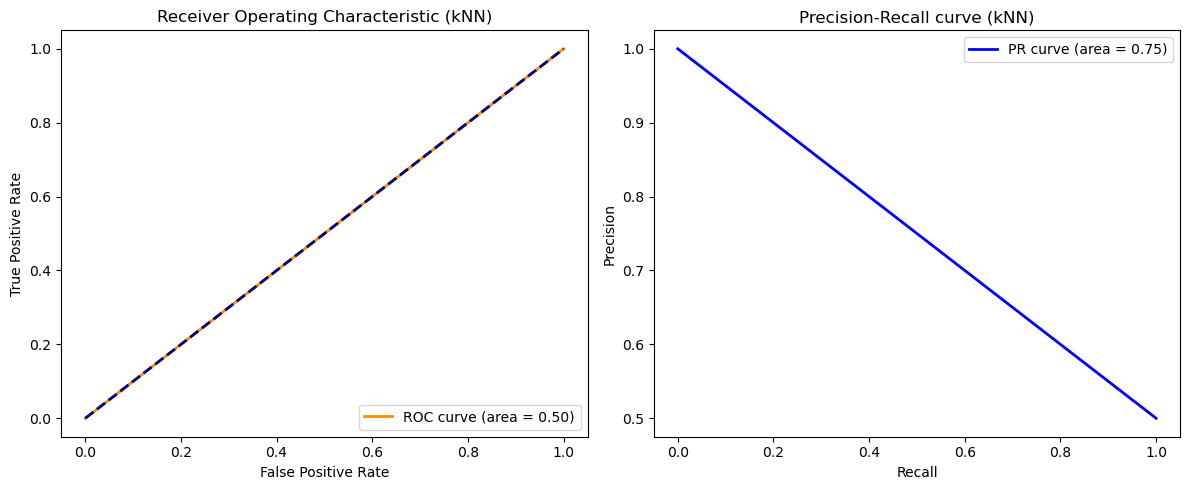

              precision    recall  f1-score   support

           0       0.50      1.00      0.67     28432
           1       0.00      0.00      0.00     28432

    accuracy                           0.50     56864
   macro avg       0.25      0.50      0.33     56864
weighted avg       0.25      0.50      0.33     56864



In [17]:
import matplotlib.pyplot as plt

# Convert boolean anomaly flags to integer labels (0 for anomalies, 1 for normal)
y_pred_test_knn = (anomalies_test == False).astype(int)

# Calculate ROC Curve and AUC for kNN
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_test_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

# Calculate Precision-Recall Curve and AUC for kNN
precision_knn, recall_knn, _ = precision_recall_curve(y_test, y_pred_test_knn)
pr_auc_knn = auc(recall_knn, precision_knn)

# Generate a classification report for kNN
class_report_knn = classification_report(y_test, y_pred_test_knn)

# Plotting the ROC and Precision-Recall Curves for kNN
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(fpr_knn, tpr_knn, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_knn:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (kNN)')
plt.legend(loc="lower right")

plt.subplot(1, 2, 2)
plt.plot(recall_knn, precision_knn, color='blue', lw=2, label=f'PR curve (area = {pr_auc_knn:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve (kNN)')
plt.legend(loc="upper right")

plt.tight_layout()
plt.show()

print(class_report)

In [19]:
np.unique(np.array(y_pred_test_knn))

array([0])

### Local Outlier Factor (LOF)

<span style="font-size: 150%; color:red">have'nt found reasonable parameters yet (maybe not suited for our problem at hand)</span>

[see here for a blog post](https://towardsdatascience.com/local-outlier-factor-lof-algorithm-for-outlier-identification-8efb887d9843)

Local Outlier Factor (LOF) is an algorithm used for detecting anomalies in a dataset. It is particularly useful in situations where the data contains clusters of varying densities. LOF works by measuring the local deviation of a given data point with respect to its neighbors, allowing it to identify outliers that may not stand out in the global context but are anomalous in their local regions.

Advantages of LOF

- A point will be considered as an outlier if it is at a small distance to the extremely dense cluster. The global approach may not consider that point as an outlier. But the LOF can effectively identify the local outliers.

Disadvantages of LOF

- Since LOF is a ratio, it is tough to interpret. There is no specific threshold value above which a point is defined as an outlier. The identification of an outlier is dependent on the problem and the user.

The main parameters for LOF are:

- **Number of Neighbors (n_neighbors)**: This is the number of neighbors to consider when calculating the local density. A small number of neighbors can make the algorithm sensitive to local noise, while too large a number may blend densities of different clusters. A common approach is to start with a value like 20 and adjust based on the dataset's characteristics and the results obtained.

- **Contamination (contamination)**: This parameter represents the proportion of outliers you expect in your data. It's used to automatically determine the threshold for labeling a point as an outlier. It can be set based on domain knowledge or exploratory analysis. <span style="color:red">contamination is 0 in the training data but the method of sklearn does not allow us to set it to 0, so we pick a very low value of contamination</span>

- **Metric (metric)**: This defines the distance metric to use for calculating distances between instances. Common choices include 'euclidean', 'manhattan', or 'minkowski'.

- **Algorithm (algorithm)**: This parameter determines the algorithm used to compute the nearest neighbors. Options like 'auto', 'ball_tree', 'kd_tree', and 'brute' can be chosen based on dataset size and feature characteristics.

In [26]:
# code snippet
import numpy as np
from sklearn.neighbors import LocalOutlierFactor
X = [[-1.1], [0.2], [101.1], [0.3]]
clf = LocalOutlierFactor(n_neighbors=2)
clf.fit_predict(X)

array([ 1,  1, -1,  1])

#### parameter search for n_neighbors

In [27]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import silhouette_score

# Scale the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the range of n_neighbors to test
n_neighbors_range = range(5, 50, 5)  # For example, from 5 to 45 in steps of 5

# Variable to store the best parameter and corresponding score
best_n_neighbors = None
best_score = -1

# Loop over the range of n_neighbors values
for n_neighbors in n_neighbors_range:
    print("n_neighbors: ", n_neighbors)
    # Initialize and fit the LOF model
    lof = LocalOutlierFactor(n_neighbors=n_neighbors, contamination=0.5)
    #lof.fit(X_train_scaled)

    # Predict on the scaled test data
    y_pred_test = lof.fit_predict(X_test_scaled)

    # Evaluate the model (using silhouette score as an example)
    score = silhouette_score(X_test_scaled, y_pred_test)

    # Update the best parameters if the current model is better
    if score > best_score:
        best_score = score
        best_n_neighbors = n_neighbors

# Output the best parameter
print(f"Best n_neighbors: {best_n_neighbors} with silhouette score: {best_score}")

n_neighbors:  5
n_neighbors:  10
n_neighbors:  15
n_neighbors:  20
n_neighbors:  25
n_neighbors:  30
n_neighbors:  35
n_neighbors:  40
n_neighbors:  45
Best n_neighbors: 25 with silhouette score: 0.0316412998698237


--> really not a good silhouette score ...

#### with fitting

In [49]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import LocalOutlierFactor

# Initialize and fit the MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Set the parameters for LOF
n_neighbors = 25  # Adjust based on your dataset
contamination_rate = 0.005  # A very low contamination rate

# Initialize the LOF model
lof = LocalOutlierFactor(n_neighbors=n_neighbors, contamination=contamination_rate)

# Fit the model on the training data (for learning "normal" data characteristics)
lof.fit(X_train_scaled)

# Predict anomalies on the test data
y_pred_test = lof.fit_predict(X_test_scaled)

# Convert predictions to binary format (1 for normal, 0 for anomaly)
y_pred_test = (y_pred_test == 0).astype(int)

In [50]:
np.unique(np.array(y_pred_test))

array([0])

In [51]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

# Evaluate method 
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1_score = f1_score(y_test, y_pred_test)
roc_auc = roc_auc_score(y_test, y_pred_test)

# Print evaluation metrics 
print("Evaluation Metrics for k=2:")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1_score}")
print(f"AUC-ROC: {roc_auc}")

Evaluation Metrics for k=2:
Precision: 0.0
Recall: 0.0
F1-Score: 0.0
AUC-ROC: 0.5


C:\Users\Hasan\anaconda3\envs\env_full\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


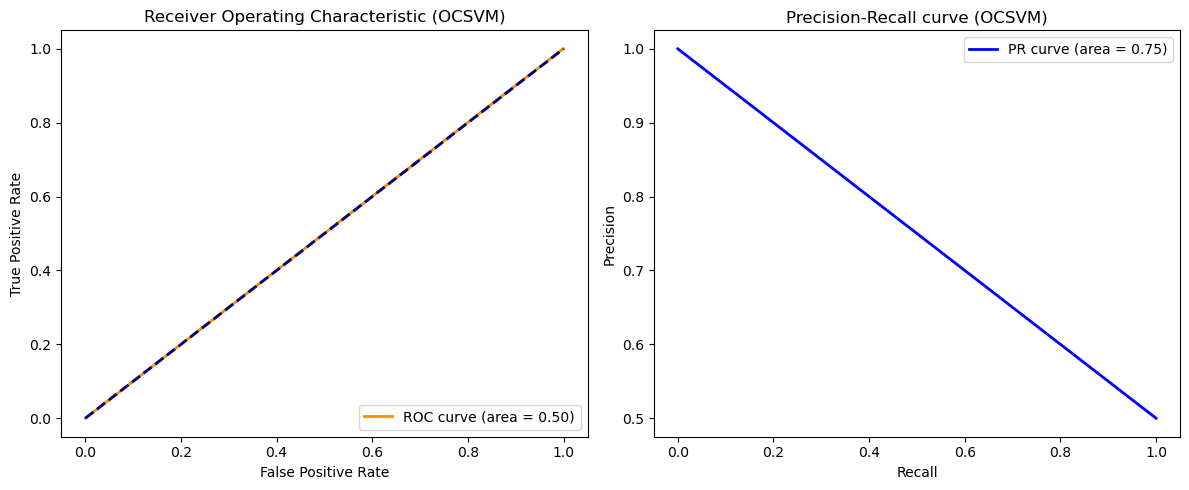

              precision    recall  f1-score   support

           0       0.77      0.00      0.00     28432
           1       0.50      1.00      0.67     28432

    accuracy                           0.50     56864
   macro avg       0.64      0.50      0.33     56864
weighted avg       0.64      0.50      0.33     56864



In [43]:
from sklearn.metrics import (
    f1_score,
    confusion_matrix,
    mean_absolute_error,
    mean_squared_error,
    precision_recall_curve,
    r2_score,
    roc_auc_score,
    classification_report,
    roc_curve, 
    auc
)

# Calculate ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_test)
roc_auc = auc(fpr, tpr)

# Calculate Precision-Recall Curve and AUC
precision, recall, _ = precision_recall_curve(y_test, y_pred_test)
pr_auc = auc(recall, precision)

# Generate a classification report
class_report = classification_report(y_test, y_pred_test)

# Plotting the ROC and Precision-Recall Curves
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (OCSVM)')
plt.legend(loc="lower right")

plt.subplot(1, 2, 2)
plt.plot(recall, precision, color='blue', lw=2, label=f'PR curve (area = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve (OCSVM)')
plt.legend(loc="upper right")

plt.tight_layout()
plt.show()

print(class_report)

#### without fitting

In [53]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import LocalOutlierFactor

# Initialize and fit the MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Set the parameters for LOF
n_neighbors = 25  # Adjust based on your dataset
contamination_rate = 0.5  # A very low contamination rate

# Initialize the LOF model
lof = LocalOutlierFactor(n_neighbors=n_neighbors, contamination=contamination_rate)

# Fit the model on the training data (for learning "normal" data characteristics)
# lof.fit(X_train_scaled)

# Predict anomalies on the test data
y_pred_test = lof.fit_predict(X_test_scaled)

# Convert predictions to binary format (1 for normal, 0 for anomaly)
y_pred_test = (y_pred_test == 0).astype(int)

In [54]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

# Evaluate method 
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1_score = f1_score(y_test, y_pred_test)
roc_auc = roc_auc_score(y_test, y_pred_test)

# Print evaluation metrics 
print("Evaluation Metrics for k=2:")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1_score}")
print(f"AUC-ROC: {roc_auc}")

Evaluation Metrics for k=2:
Precision: 0.0
Recall: 0.0
F1-Score: 0.0
AUC-ROC: 0.5


C:\Users\Hasan\anaconda3\envs\env_full\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


C:\Users\Hasan\anaconda3\envs\env_full\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hasan\anaconda3\envs\env_full\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hasan\anaconda3\envs\env_full\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


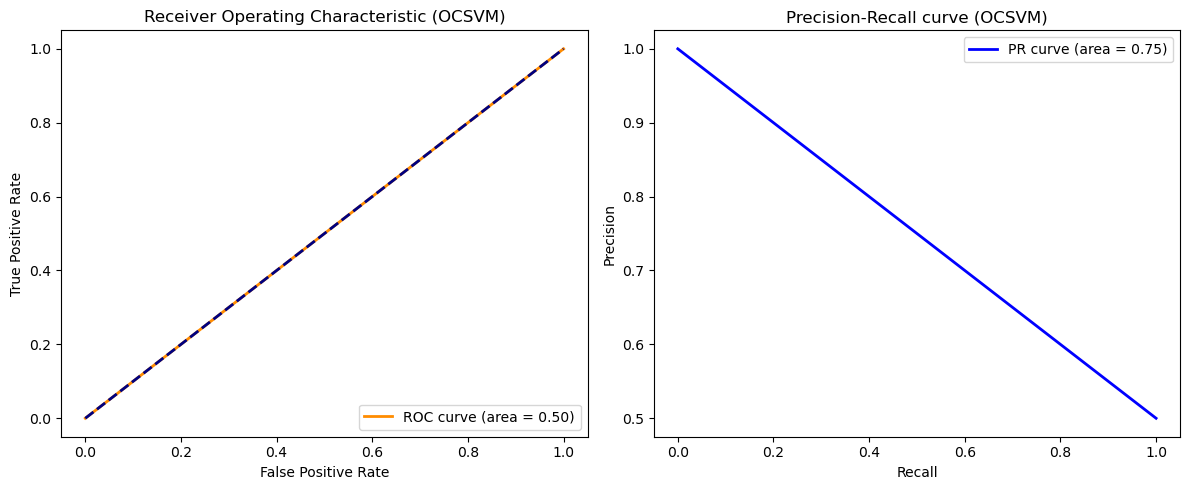

              precision    recall  f1-score   support

           0       0.50      1.00      0.67     28432
           1       0.00      0.00      0.00     28432

    accuracy                           0.50     56864
   macro avg       0.25      0.50      0.33     56864
weighted avg       0.25      0.50      0.33     56864



In [24]:
from sklearn.metrics import (
    f1_score,
    confusion_matrix,
    mean_absolute_error,
    mean_squared_error,
    precision_recall_curve,
    r2_score,
    roc_auc_score,
    classification_report,
    roc_curve, 
    auc
)

# Calculate ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_test)
roc_auc = auc(fpr, tpr)

# Calculate Precision-Recall Curve and AUC
precision, recall, _ = precision_recall_curve(y_test, y_pred_test)
pr_auc = auc(recall, precision)

# Generate a classification report
class_report = classification_report(y_test, y_pred_test)

# Plotting the ROC and Precision-Recall Curves
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (OCSVM)')
plt.legend(loc="lower right")

plt.subplot(1, 2, 2)
plt.plot(recall, precision, color='blue', lw=2, label=f'PR curve (area = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve (OCSVM)')
plt.legend(loc="upper right")

plt.tight_layout()
plt.show()

print(class_report)

### Isolation Forest (IForest)

<span style="font-size: 150%; color:green">pretty good out of the box method</span>

Isolation Forest (iForest) is an effective anomaly detection method, particularly suitable for high-dimensional datasets. Its fundamental principle is different from most anomaly detection algorithms. Instead of trying to build a model of normal instances, iForest isolates anomalies.

1. Random Forest Structure: The algorithm builds an ensemble of decision trees (a random forest). Each tree is grown randomly.

2. Isolation of Points: In each tree, a random feature is selected, and then a split value is randomly chosen within the range of that feature. This process isolates points in the dataset, and the idea is that anomalies are easier to isolate than normal points.

3. Path Lengths to Isolation: The number of splits required to isolate a sample is recorded. Anomalies, being few and different, generally have shorter path lengths in the trees, whereas normal points have longer paths.

4. Anomaly Score: After the forest is built, the path length of data points in the trees is averaged and normalized to produce an anomaly score. Shorter paths indicate higher likelihood of being anomalies.

Key Hyperparameters:

- n_estimators: The number of trees in the forest. More trees increase the model's robustness but also the computation time.

- max_samples: The number of samples to draw from the dataset to train each tree. It can be a fraction of the total dataset or a fixed number.

- contamination: The proportion of outliers expected in the dataset. It affects the threshold for scoring anomalies.

- max_features: The number of features to draw from the dataset to train each tree.

- random_state: Controls the randomness of the forest creation for reproducibility.

In [28]:
from sklearn.ensemble import IsolationForest

In [29]:
# code snippet
from sklearn.ensemble import IsolationForest
X = [[-1.1], [0.3], [0.5], [100]]
clf = IsolationForest(random_state=0).fit(X)
clf.predict([[0.1], [0], [90]])

array([ 1,  1, -1])

In [38]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import IsolationForest

# Scale the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define Isolation Forest parameters
n_estimators = 100  # Number of trees in the forest
max_samples = 'auto'  # Number of samples to draw to train each tree
contamination = 0.05  # Proportion of outliers in the dataset
random_state = 42  # For reproducibility

# Initialize the Isolation Forest model
iso_forest = IsolationForest(n_estimators=n_estimators, max_samples=max_samples, 
                             contamination=contamination, random_state=random_state)

# Fit the model on the training data and predict on the test data
iso_forest.fit(X_train_scaled)
y_pred_test = iso_forest.predict(X_test_scaled)

# Convert predictions to binary format (1 for normal, -1 for anomaly)
y_pred_test = (y_pred_test == -1).astype(int)

In [39]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

# Evaluate method 
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1_score = f1_score(y_test, y_pred_test)
roc_auc = roc_auc_score(y_test, y_pred_test)

# Print evaluation metrics 
print("Evaluation Metrics for k=2:")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1_score}")
print(f"AUC-ROC: {roc_auc}")

Evaluation Metrics for k=2:
Precision: 0.9367241379310345
Recall: 0.7643500281373101
F1-Score: 0.8418035326929036
AUC-ROC: 0.8563590320765335


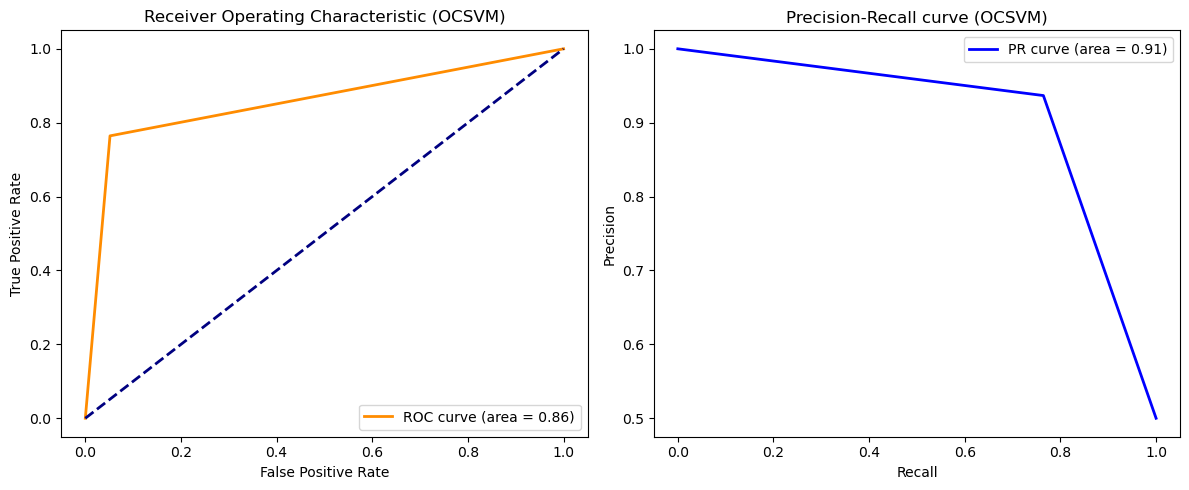

              precision    recall  f1-score   support

           0       0.80      0.95      0.87     28432
           1       0.94      0.76      0.84     28432

    accuracy                           0.86     56864
   macro avg       0.87      0.86      0.86     56864
weighted avg       0.87      0.86      0.86     56864



In [40]:
from sklearn.metrics import (
    f1_score,
    confusion_matrix,
    mean_absolute_error,
    mean_squared_error,
    precision_recall_curve,
    r2_score,
    roc_auc_score,
    classification_report,
    roc_curve, 
    auc
)


# Calculate ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_test)
roc_auc = auc(fpr, tpr)

# Calculate Precision-Recall Curve and AUC
precision, recall, _ = precision_recall_curve(y_test, y_pred_test)
pr_auc = auc(recall, precision)

# Generate a classification report
class_report = classification_report(y_test, y_pred_test)

# Plotting the ROC and Precision-Recall Curves
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (OCSVM)')
plt.legend(loc="lower right")

plt.subplot(1, 2, 2)
plt.plot(recall, precision, color='blue', lw=2, label=f'PR curve (area = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve (OCSVM)')
plt.legend(loc="upper right")

plt.tight_layout()
plt.show()

print(class_report)

# Complex models
Ideas:
- Autoencoder
- Ensemble models: IForest and LODA
- Variational Autoencoder (VAE)

### Using Autoencoders for anomaly detection

Idea:     
1. Train the autoencoder using your prepared dataset. The model learns to encode and decode the normal data, minimizing the reconstruction error.
2. After training, use the autoencoder to reconstruct unseen data.
3. Calculate the reconstruction error for each instance. For normal data, the error should be relatively low, as the autoencoder has learned to reconstruct it well.
4. For anomalies (which the autoencoder hasn't seen during training), the reconstruction error will likely be higher, as these don't conform to the "normal" patterns the model has learned.
5. Define a threshold for the reconstruction error to classify a data point as normal or anomalous. This threshold can be set based on various methods, like a fixed value, a certain percentile based on the training data, or through cross-validation.

In [10]:
from sklearn.model_selection import train_test_split

# train // validate - no labels since they're all clean anyway
X_train_, X_validate_ = train_test_split(X_train, 
                                       test_size=VALIDATE_SIZE, 
                                       random_state=RANDOM_SEED)

In [11]:
X_train_.shape

(204706, 30)

In [12]:
X_validate_.shape

(51177, 30)

### get normalization parameters by fitting to the training data
Idea: if validation / testing data has data that is higher / lower than max / min value in the training data, then its not going to be normalized correctly and as a result, the autoencoder should notice that immediately

In [13]:
from sklearn.preprocessing import Normalizer, MinMaxScaler


# Initialize the Normalizer and MinMaxScaler
normalizer = Normalizer().fit(X_train_)
min_max_scaler = MinMaxScaler().fit(X_train_)

# Apply the normalizer and MinMaxScaler to the dataset
X_train_transformed = normalizer.transform(X_train_)
X_train_transformed = min_max_scaler.transform(X_train_transformed)

X_validate_transformed = normalizer.transform(X_validate_)
X_validate_transformed = min_max_scaler.transform(X_validate_transformed)

In [14]:
import torch
import torch.nn as nn
import torch.optim as optim

class Autoencoder(nn.Module):
    def __init__(self, input_dim):
        super(Autoencoder, self).__init__()
        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, input_dim),
            nn.ELU(),
            nn.Linear(input_dim, 16),
            nn.ELU(),
            nn.Linear(16, 8),
            nn.ELU(),
            nn.Linear(8, 4),
            nn.ELU(),
            nn.Linear(4, 2),
            nn.ELU()
        )
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(2, 4),
            nn.ELU(),
            nn.Linear(4, 8),
            nn.ELU(),
            nn.Linear(8, 16),
            nn.ELU(),
            nn.Linear(16, input_dim),
            nn.ELU()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# Parameters
input_dim = X_train_transformed.shape[1]
batch_size = 256
epochs = 100

# Create the model
autoencoder = Autoencoder(input_dim)

# Define optimizer and loss function
optimizer = optim.Adam(autoencoder.parameters(), lr=0.001)
criterion = nn.MSELoss()

# using GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
autoencoder = autoencoder.to(device)

In [15]:
from torch.utils.data import DataLoader, TensorDataset

# Convert data to PyTorch tensors
X_train_tensor = torch.Tensor(X_train_transformed)

# Create a dataset and data loader
train_dataset = TensorDataset(X_train_tensor, X_train_tensor)
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

# Convert validation data to PyTorch tensors
X_val_tensor = torch.Tensor(X_validate_transformed)

# Create a dataset and data loader for validation
val_dataset = TensorDataset(X_val_tensor, X_val_tensor)
val_loader = DataLoader(dataset=val_dataset, batch_size=batch_size)

In [16]:
# Early stopping parameters
patience = 10  # Number of epochs to wait for improvement before stopping
min_delta = 0.001  # Minimum change to qualify as an improvement
best_loss = float('inf')
counter = 0

In [17]:
for epoch in range(epochs):
    # Training
    autoencoder.train()
    for data in train_loader:
        inputs, targets = data
        inputs, targets = inputs.to(device), targets.to(device)  # Move data to the same device as the model
        optimizer.zero_grad()
        outputs = autoencoder(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

    # Validation
    autoencoder.eval()
    val_loss = 0.0
    with torch.no_grad():
        for data in val_loader:
            inputs, targets = data
            inputs, targets = inputs.to(device), targets.to(device)  # Move data to the same device as the model
            outputs = autoencoder(inputs)
            val_loss += criterion(outputs, targets).item()

    val_loss /= len(val_loader)
    print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}, Val Loss: {val_loss:.4f}')

    # Check for improvement for early stopping
    if best_loss - val_loss > min_delta:
        best_loss = val_loss
        counter = 0
        # Save the best model
        torch.save(autoencoder.state_dict(), 'best_autoencoder.pth')
    else:
        counter += 1

    if counter >= patience:
        print(f'Early stopping triggered after {epoch + 1} epochs')
        break

Epoch [1/100], Loss: 0.0000, Val Loss: 0.0000
Epoch [2/100], Loss: 0.0000, Val Loss: 0.0000
Epoch [3/100], Loss: 0.0000, Val Loss: 0.0000
Epoch [4/100], Loss: 0.0000, Val Loss: 0.0000
Epoch [5/100], Loss: 0.0000, Val Loss: 0.0000
Epoch [6/100], Loss: 0.0000, Val Loss: 0.0000
Epoch [7/100], Loss: 0.0000, Val Loss: 0.0000
Epoch [8/100], Loss: 0.0000, Val Loss: 0.0000
Epoch [9/100], Loss: 0.0000, Val Loss: 0.0000
Epoch [10/100], Loss: 0.0000, Val Loss: 0.0000
Epoch [11/100], Loss: 0.0000, Val Loss: 0.0000
Early stopping triggered after 11 epochs


In [18]:
# transform the test set with the pipeline fitted to the training set
X_test_transformed = normalizer.transform(X_test)
X_test_transformed = min_max_scaler.transform(X_test_transformed)

# Convert the transformed test set to a PyTorch tensor
X_test_tensor = torch.Tensor(X_test_transformed).to(device)

In [19]:
# Get the model's reconstruction of the test set
autoencoder.eval()
with torch.no_grad():
    reconstructions = autoencoder(X_test_tensor).cpu().numpy()

In [20]:
# Calculate the MSE reconstruction loss per row
mse = np.mean(np.power(X_test_transformed - reconstructions, 2), axis=1)

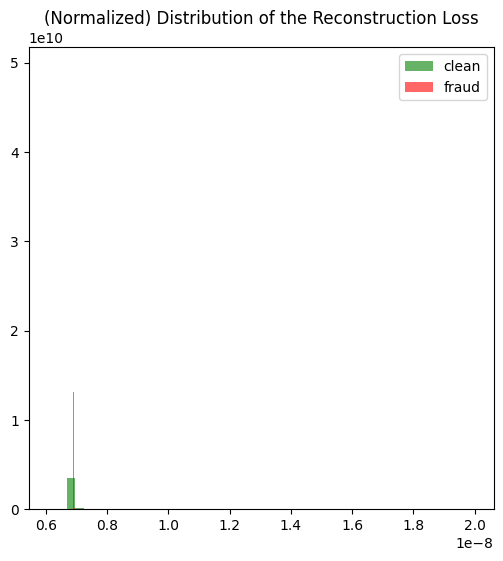

In [21]:
clean = mse[y_test == 0]
fraud = mse[y_test == 1]

# Plotting the distribution of reconstruction loss
fig, ax = plt.subplots(figsize=(6,6))
ax.hist(clean, bins=50, density=True, label="clean", alpha=.6, color="green")
ax.hist(fraud, bins=50, density=True, label="fraud", alpha=.6, color="red")
plt.title("(Normalized) Distribution of the Reconstruction Loss")
plt.legend()
plt.show()

In [22]:
np.mean(clean)

6.912054233159276e-09

In [23]:
np.mean(fraud)

6.920910403020872e-09

In [24]:
np.median(clean)

6.91613880706124e-09

In [25]:
np.mean(fraud)

6.920910403020872e-09

In [26]:
a = np.mean(fraud)
m = np.median(mse)
ad = np.abs(a - m)
mad = np.median(ad)
res = 0.6745 * ad / mad
res

0.6745

In [27]:
clean.shape

(28432,)

In [28]:
X_test.shape

(56864, 30)

In [29]:
def mad_score(points):
    m = np.median(points)
    ad = np.abs(points - m)
    mad = np.median(ad)
    return 0.6745 * ad / mad

z_scores = mad_score(mse)

In [30]:
threshold = 0.6745  # Set meaningful threshold
outliers = z_scores > threshold

In [31]:
print("Number of outliers: ", np.sum(outliers))

Number of outliers:  28432


In [32]:
outliers

array([False,  True,  True, ..., False, False,  True])

In [33]:
y_pred_test = outliers
# Convert predictions to match y_test labels (0 for anomalies, 1 for normal)
y_pred_test = y_pred_test.astype(int)

In [34]:
y_pred_test

array([0, 1, 1, ..., 0, 0, 1])

In [35]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

# Evaluate method 
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1_score = f1_score(y_test, y_pred_test)
roc_auc = roc_auc_score(y_test, y_pred_test)

# Print evaluation metrics 
print("Evaluation Metrics for k=2:")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1_score}")
print(f"AUC-ROC: {roc_auc}")

Evaluation Metrics for k=2:
Precision: 0.3092290377039955
Recall: 0.3092290377039955
F1-Score: 0.3092290377039955
AUC-ROC: 0.30922903770399546


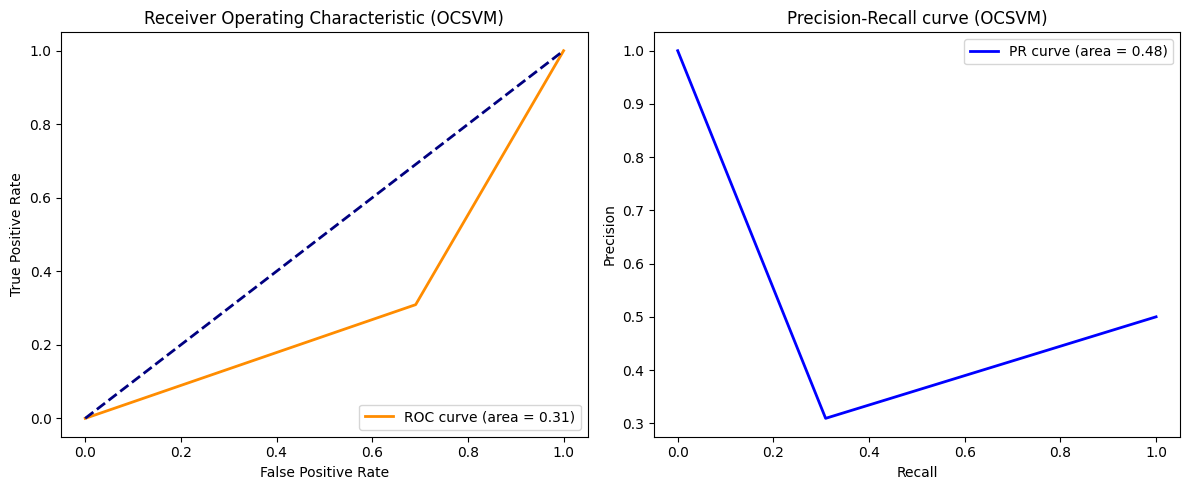

              precision    recall  f1-score   support

           0       0.31      0.31      0.31     28432
           1       0.31      0.31      0.31     28432

    accuracy                           0.31     56864
   macro avg       0.31      0.31      0.31     56864
weighted avg       0.31      0.31      0.31     56864



In [36]:
from sklearn.metrics import (
    f1_score,
    confusion_matrix,
    mean_absolute_error,
    mean_squared_error,
    precision_recall_curve,
    r2_score,
    roc_auc_score,
    classification_report,
    roc_curve, 
    auc
)


# Calculate ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_test)
roc_auc = auc(fpr, tpr)

# Calculate Precision-Recall Curve and AUC
precision, recall, _ = precision_recall_curve(y_test, y_pred_test)
pr_auc = auc(recall, precision)

# Generate a classification report
class_report = classification_report(y_test, y_pred_test)

# Plotting the ROC and Precision-Recall Curves
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (OCSVM)')
plt.legend(loc="lower right")

plt.subplot(1, 2, 2)
plt.plot(recall, precision, color='blue', lw=2, label=f'PR curve (area = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve (OCSVM)')
plt.legend(loc="upper right")

plt.tight_layout()
plt.show()

print(class_report)